In [204]:
# Function to load CIFAR-10 files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
        data = dict['data'].reshape((len(dict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
        labels = dict['labels']
    return data, labels


In [205]:
import numpy as np

# Loading data and splitting data into training and validation data
fname = 'cifar-10-python/cifar-10-batches-py/data_batch_'
for i in range(1,6):
    if i == 1:
        data, labels = unpickle(fname+str(i))
    else:
        dt, lb = unpickle(fname+str(i))
        data = np.append(data,dt, axis=0)
        labels = labels + lb
print(data.shape)

train_data = data[0:30000, :, :, :]
train_labels = labels[0:30000]
print('Data Shape and Label Length of training data: ' + str(train_data.shape) + " - " + str(len(train_labels)))

validation_data = data[30000:50000, :, :, :]
validation_labels = labels[30000:50000]
print('Data Shape and Label Length of validation data: ' + str(validation_data.shape) + " - " + str(len(validation_labels)))

# Loading test data
fname = 'cifar-10-python/cifar-10-batches-py/test_batch'
test_data, test_labels = unpickle(fname)
print('Data Shape and Label Length of test data: ' + str(test_data.shape) + " - " + str(len(test_labels)))

# Scaling into [0,1] interval
train_data = train_data.astype('float32')/255
validation_data = validation_data.astype('float32')/255
test_data = test_data.astype('float32')/255

# Make labels categorical
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)


(50000, 32, 32, 3)
Data Shape and Label Length of training data: (30000, 32, 32, 3) - 30000
Data Shape and Label Length of validation data: (20000, 32, 32, 3) - 20000
Data Shape and Label Length of test data: (10000, 32, 32, 3) - 10000


In [206]:
# Define a basic convolutional network with 3 layers
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Define the densely conneted clasifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                65600     
__________

In [207]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [208]:
# Fit the model
history = model.fit(train_data, 
                    train_labels, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data=(validation_data, validation_labels)
                   )


Train on 30000 samples, validate on 20000 samples
Epoch 1/30
30000/30000 [==============================] - 1657s 55ms/step - loss: 1.7793 - acc: 0.3540 - val_loss: 1.4675 - val_acc: 0.4728
Epoch 2/30
30000/30000 [==============================] - 79s 3ms/step - loss: 1.4076 - acc: 0.4961 - val_loss: 1.3506 - val_acc: 0.5207
Epoch 3/30
30000/30000 [==============================] - 71s 2ms/step - loss: 1.2233 - acc: 0.5691 - val_loss: 1.2349 - val_acc: 0.5684
Epoch 4/30
30000/30000 [==============================] - 69s 2ms/step - loss: 1.1007 - acc: 0.6152 - val_loss: 1.1485 - val_acc: 0.5929
Epoch 5/30
30000/30000 [==============================] - 67s 2ms/step - loss: 0.9994 - acc: 0.6506 - val_loss: 1.0450 - val_acc: 0.6279
Epoch 6/30
30000/30000 [==============================] - 67s 2ms/step - loss: 0.9159 - acc: 0.6794 - val_loss: 1.0116 - val_acc: 0.6512
Epoch 7/30
30000/30000 [==============================] - 68s 2ms/step - loss: 0.8435 - acc: 0.7048 - val_loss: 0.9713 - val_

In [211]:
model.save('cifar-10-base-1')

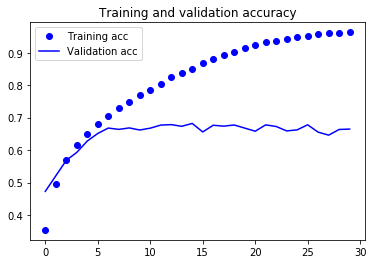

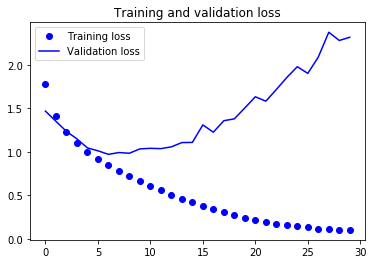

In [212]:
# Plot the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [210]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc: ', test_acc)

10000/10000 [==============================] - 8s 803us/step
test_acc:  0.6645
